## Import stuff

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Explore original data

sets downloaded from dmc without any preprocessing

## Read files

In [34]:
PATH = "C:\\DMC_2018\\raw_data\\"

items = pd.read_csv(PATH + "items.csv", sep='|')
prices = pd.read_csv(PATH + "prices.csv", sep='|')
train = pd.read_csv(PATH + "train.csv", sep='|')


## Explore Items.csv

### basic info

In [41]:
items.head(15)

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
0,10000,XL ( 158-170 ),gruen,Nike,25.33,1,7,25,1,2017-10-01
1,10001,L,schwarz,Jako,38.03,1,7,16,1,2017-10-01
2,10003,3 (35-38 ),weiss,Jako,12.63,1,7,13,1,2017-10-01
3,10003,4 ( 39-42 ),weiss,Jako,12.63,1,7,13,1,2017-10-01
4,10003,5 ( 43-46 ),weiss,Jako,12.63,1,7,13,1,2017-10-01
5,10006,XL,blau,Under Armour,57.08,15,24,0,1,2017-10-01
6,10008,XL,blau,PUMA,25.33,1,7,8,12,2017-10-01
7,10013,L,schwarz,adidas,69.78,1,7,16,1,2017-10-27
8,10013,M,schwarz,adidas,69.78,1,7,16,1,2017-10-27
9,10013,S,schwarz,adidas,69.78,1,7,16,1,2017-10-27


In [40]:
items.isnull().sum()

pid             0
size            9
color           0
brand           0
rrp             0
mainCategory    0
category        0
subCategory     0
stock           0
releaseDate     0
dtype: int64

In [82]:
items[items['size'].isnull()]

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
343,10400,NaN,schwarz,adidas,12.63,1,2,27,1,2017-10-01
540,10609,NaN,schwarz,Uhlsport,5.01,1,2,27,8,2017-10-01
3537,13515,NaN,schwarz,Uhlsport,2.47,1,2,27,1,2017-10-01
6050,15996,NaN,schwarz,Uhlsport,6.28,1,2,27,3,2017-10-01
8795,18754,NaN,schwarz,Uhlsport,2.47,1,2,27,2,2017-10-01
9495,19517,NaN,silber,adidas,15.17,1,2,27,1,2017-10-01
9894,19891,NaN,schwarz,Uhlsport,2.47,1,2,27,3,2017-10-01
10259,20248,NaN,weiss,Uhlsport,5.01,1,2,27,8,2017-10-01
10992,21001,NaN,silber,Uhlsport,8.82,1,2,27,1,2017-10-01


In [84]:
items[(items['pid'] == 10400) 
      | (items['pid'] == 10609) 
      | (items['pid'] == 13515) 
      | (items['pid'] == 15996)
      | (items['pid'] == 18754)
      | (items['pid'] == 19517)
      | (items['pid'] == 19891)
      | (items['pid'] == 20248)
      | (items['pid'] == 21001)] 

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
343,10400,onesize,schwarz,adidas,12.63,1,2,27,1,2017-10-01
540,10609,onesize,schwarz,Uhlsport,5.01,1,2,27,8,2017-10-01
3537,13515,onesize,schwarz,Uhlsport,2.47,1,2,27,1,2017-10-01
6050,15996,onesize,schwarz,Uhlsport,6.28,1,2,27,3,2017-10-01
8795,18754,onesize,schwarz,Uhlsport,2.47,1,2,27,2,2017-10-01
9495,19517,onesize,silber,adidas,15.17,1,2,27,1,2017-10-01
9894,19891,onesize,schwarz,Uhlsport,2.47,1,2,27,3,2017-10-01
10259,20248,onesize,weiss,Uhlsport,5.01,1,2,27,8,2017-10-01
10992,21001,onesize,silber,Uhlsport,8.82,1,2,27,1,2017-10-01


Każdy z NaN ma tylko jeden pid, a te pid posiadają tylko size NaN, więc można uznać, że to np. one size.

In [83]:
items['size'].fillna(value = 'onesize', inplace = True)

Pandas nie umie trzymać NaNów w kolumnie integer i dlatego wczytał subCategory jako floata. Zastąpię Nany w tej kolumnie wartością 0 i zamienię ją na int64. 

In [37]:
items['subCategory'].fillna(0, inplace=True)
items['subCategory']=items['subCategory'].astype('int64', inplace=True)

In [69]:
items[items['subCategory']==0]

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
5,10006,XL,blau,Under Armour,57.08,15,24,0,1,2017-10-01
12,10017,L,blau,Under Armour,69.78,15,33,0,1,2017-10-01
119,10153,L,gelb,Uhlsport,44.38,15,33,0,1,2017-10-01
133,10167,M,weiss,Jako,25.33,15,16,0,1,2017-10-01
134,10167,S,weiss,Jako,25.33,15,16,0,1,2017-10-01
196,10228,L,schwarz,Under Armour,31.68,15,16,0,7,2017-10-01
197,10228,M,schwarz,Under Armour,31.68,15,16,0,3,2017-10-01
198,10228,XL,schwarz,Under Armour,31.68,15,16,0,1,2017-10-01
208,10244,164/176,schwarz,Jako,38.03,15,33,0,1,2017-11-22
242,10290,L,schwarz,adidas,44.38,15,16,0,2,2017-11-09


In [39]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Data columns (total 10 columns):
pid             12824 non-null int64
size            12815 non-null object
color           12824 non-null object
brand           12824 non-null object
rrp             12824 non-null float64
mainCategory    12824 non-null int64
category        12824 non-null int64
subCategory     12824 non-null int64
stock           12824 non-null int64
releaseDate     12824 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 1002.0+ KB


In [38]:
items.describe()

,pid,rrp,mainCategory,category,subCategory,stock
count,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000,12824.000000
mean,16407.743528,98.526149,3.538677,10.185823,14.559420,3.532829
std,3700.225391,90.787734,4.614558,10.035180,11.729192,11.034285
min,10000.000000,2.470000,1.000000,2.000000,0.000000,1.000000
25%,13185.000000,38.030000,1.000000,2.000000,3.000000,1.000000
50%,16348.500000,69.780000,1.000000,7.000000,13.000000,1.000000
75%,19635.000000,114.230000,9.000000,10.000000,22.000000,2.000000
max,22881.000000,463.480000,15.000000,37.000000,44.000000,459.000000


###  size

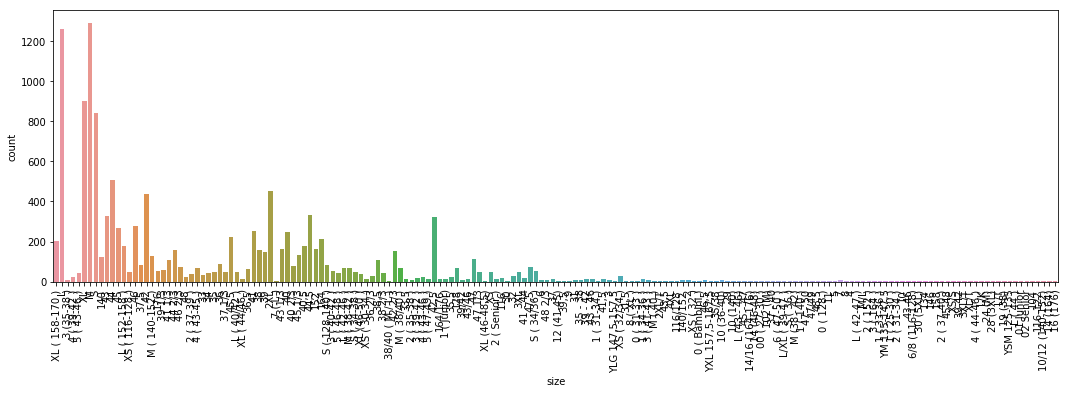

In [43]:
fig, ax = plt.subplots(figsize=(18,5))
s=sns.countplot(x='size', data=items, ax=ax)
l=s.set_xticklabels(labels=s.get_xticklabels(), rotation=90) # had to be assigned to a variable to suppres output

### color, brand

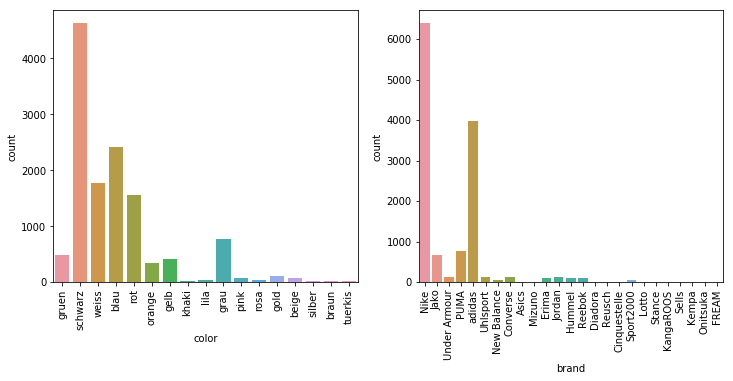

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
s1=sns.countplot(x='color', data=items, ax=ax[0])
s2=sns.countplot(x='brand', data=items, ax=ax[1])
l1=s1.set_xticklabels(labels=s1.get_xticklabels(), rotation=90) # had to be assigned to a variable to suppres output
l2=s2.set_xticklabels(labels=s2.get_xticklabels(), rotation=90) # had to be assigned to a variable to suppres output

### mainCategory, category, subCategory

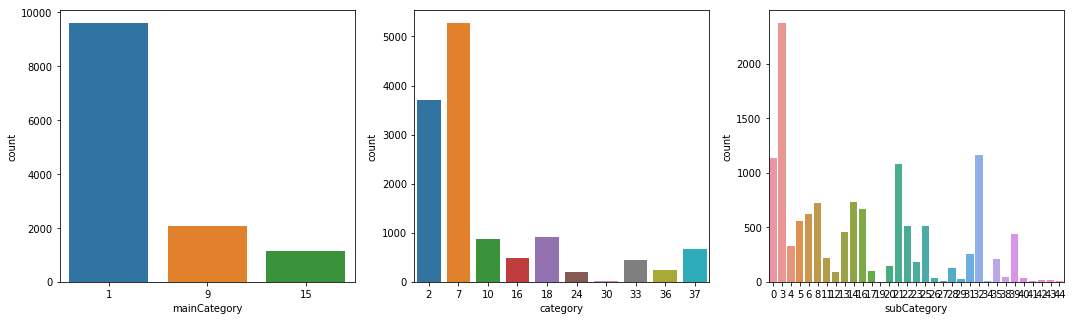

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
s1=sns.countplot(x='mainCategory', data=items, ax=ax[0])
s2=sns.countplot(x='category', data=items, ax=ax[1])
s3=sns.countplot(x='subCategory', data=items, ax=ax[2])

### rrp (recomended retail? price)

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


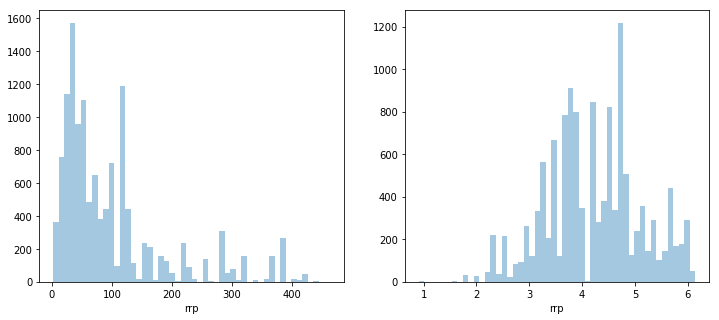

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
s1=sns.distplot(a=items.loc[:, 'rrp'], kde=False, ax=ax[0])
s2=sns.distplot(a=np.log(items.loc[:, 'rrp']), kde=False, ax=ax[1])

### stock

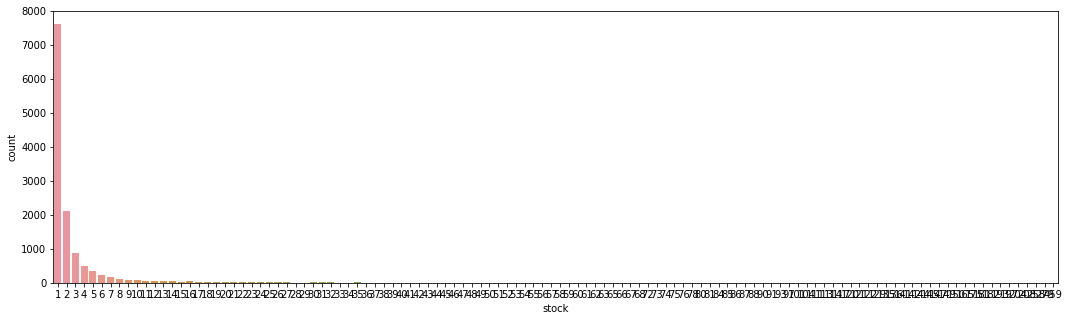

In [65]:
fig, ax = plt.subplots(figsize=(18,5))
s1=sns.countplot(x='stock',data=items, ax=ax)

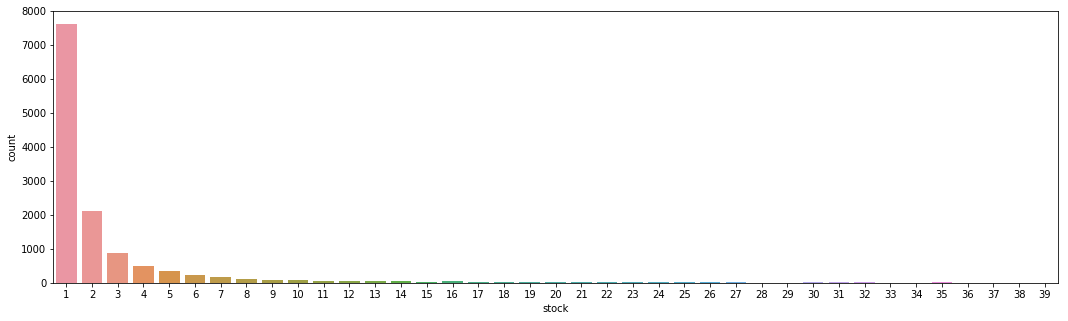

In [86]:
fig, ax = plt.subplots(figsize=(18,5))
s1=sns.countplot(x='stock',data=items[items.stock < 40], ax=ax)

## Explore prices.csv


In [16]:
prices.shape

(12824, 153)

In [17]:
prices.head(15)

,pid,size,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
0,19671,39 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
1,19671,40,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
2,19671,41 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
3,19671,42,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
4,19671,42 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
5,19671,43 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
6,19671,44,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
7,19671,44 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
8,19671,45 1/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31
9,19671,46 2/3,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,...,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31,133.31


In [ ]:
prices.isnull().sum()

pid              0
size             9
2017-10-01    1932
2017-10-02    1932
2017-10-03    1932
2017-10-04    1932
2017-10-05    1928
2017-10-06    1928
2017-10-07    1928
2017-10-08    1928
2017-10-09    1925
2017-10-10    1924
2017-10-11    1924
2017-10-12    1917
2017-10-13    1914
2017-10-14    1914
2017-10-15    1914
2017-10-16    1912
2017-10-17    1906
2017-10-18    1873
2017-10-19    1849
2017-10-20    1839
2017-10-21    1839
2017-10-22    1776
2017-10-23    1702
2017-10-24    1700
2017-10-25    1694
2017-10-26    1641
2017-10-27    1641
2017-10-28    1641
              ... 
2018-01-30       0
2018-01-31       0
2018-02-01       0
2018-02-02       0
2018-02-03       0
2018-02-04       0
2018-02-05       0
2018-02-06       0
2018-02-07       0
2018-02-08       0
2018-02-09       0
2018-02-10       0
2018-02-11       0
2018-02-12       0
2018-02-13       0
2018-02-14       0
2018-02-15       0
2018-02-16       0
2018-02-17       0
2018-02-18       0
2018-02-19       0
2018-02-20  

In [49]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Columns: 153 entries, pid to 2018-02-28
dtypes: float64(151), int64(1), object(1)
memory usage: 15.0+ MB


kolumny od 118 do końca nie mają nulli

Zobaczymy jak rozkładają się ceny w 3 losowych kolumnach bez nulli

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


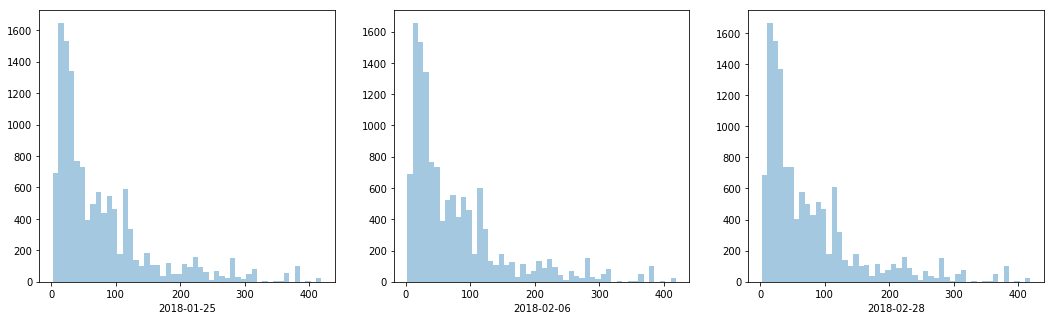

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
s1=sns.distplot(a=prices.iloc[:, 118], kde=False, ax = ax[0])
s2=sns.distplot(a=prices.iloc[:, 130], kde=False, ax = ax[1])
s3=sns.distplot(a=prices.iloc[:, 152], kde=False, ax = ax[2])


A teraz zobaczymy  jak zmieniają się ceny poszczególnych produktów w czasie 

C:\python\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


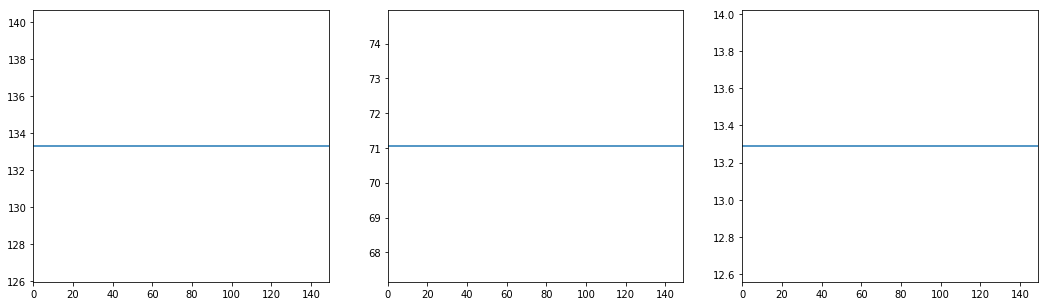

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
s1=sns.tsplot(data=prices.iloc[0, 3:], ax = ax[0])
s2=sns.tsplot(data=prices.iloc[100, 3:], ax = ax[1])
s3=sns.tsplot(data=prices.iloc[200, 3:], ax = ax[2])


Znajdźmy te produkty dla których zmienia się cena 

In [ ]:
prices[prices.iloc[:,3:].std(axis = 1) > 0.000001]

,pid,size,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
4840,16484,41,nan,nan,nan,nan,nan,nan,nan,nan,...,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620
6159,19466,46,nan,nan,nan,nan,nan,nan,nan,nan,...,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660
6956,18893,4 ( 44-46 ),nan,nan,nan,nan,nan,nan,nan,nan,...,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360
7347,22273,M,nan,nan,nan,nan,nan,nan,nan,nan,...,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460
7725,12340,S,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,44.100,43.080,42.060,42.060,42.060,42.060,42.060,42.060,42.060,42.060
7726,12340,M,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040
7727,12340,L,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040
7728,12340,XL,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,42.060,42.060,42.060,41.040,41.040,41.040,41.040,41.040,41.040,41.040
8883,17420,M,nan,nan,nan,nan,nan,nan,nan,nan,...,32.050,31.030,30.010,29.220,29.220,29.220,29.220,29.220,29.220,29.220
10435,10146,M,nan,nan,nan,nan,nan,nan,nan,nan,...,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160


## Explore train.csv

In [52]:
train.head(15)

,date,pid,size,units
0,2017-10-01,14393,2 ( 37-39 ),1
1,2017-10-01,10069,36,2
2,2017-10-01,10069,35,1
3,2017-10-01,16221,L,1
4,2017-10-01,11317,L,1
5,2017-10-01,14438,M,2
6,2017-10-01,16818,L,3
7,2017-10-01,16766,1 ( Junior),20
8,2017-10-01,11395,L,2
9,2017-10-01,11395,M,1


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135117 entries, 0 to 135116
Data columns (total 4 columns):
date     135117 non-null object
pid      135117 non-null int64
size     134941 non-null object
units    135117 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


In [54]:
train.describe()

,pid,units
count,135117.000000,135117.000000
mean,16250.792831,2.299274
std,3726.510843,4.642977
min,10000.000000,1.000000
25%,12985.000000,1.000000
50%,16157.000000,1.000000
75%,19439.000000,2.000000
max,22881.000000,472.000000


In [55]:
train.isnull().sum()

date       0
pid        0
size     176
units      0
dtype: int64

In [ ]:
selling_date_counts = train.groupby(by = ('pid', 'size')).count().sort_values(by = 'units', ascending = False)
print(selling_date_counts)

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
s1=sns.countplot(x='units',data=selling_date_counts, ax=ax)

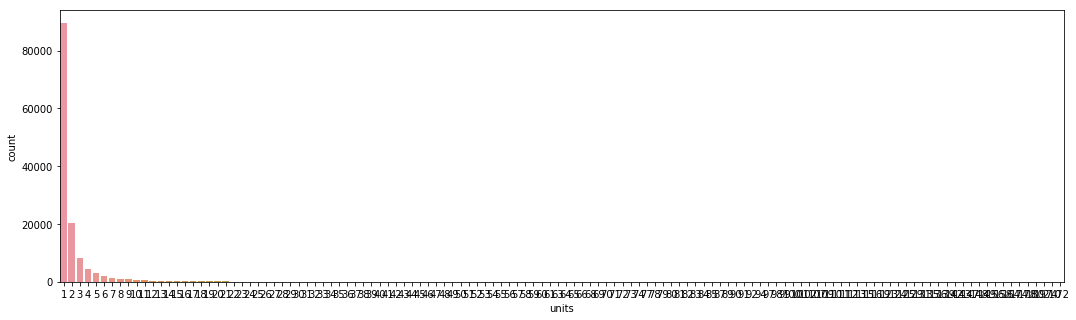

In [59]:
fig, ax = plt.subplots(figsize=(18,5))
s1=sns.countplot(x='units',data=train, ax=ax)

In [ ]:
sold_amount = train.groupby(by = ('pid', 'size')).sum().sort_values(by = 'units', ascending = False)
print(sold_amount)

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
s1=sns.countplot(x='units',data=sold_amount, ax=ax)

# Explore merged set

set obtained with preprocess.py

In [ ]:
PATH = "C:\\DMC_2018\\preprocessed_data\\"